Read iris.names file

In [2]:
import pandas as pd
irisName = open("iris.names","r")
print(irisName.read())

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

So our dataset which is stored in iris.data has 5 attributes. Attribute 1-4 are numeric which represent length and width of sepal and petal; The 5th attribute is categorical attribute which is the class name of that particular observation. Format of each observation or row is -sepal length- -sepal width- -petal length- -petal width- -class name-. The dataset has 150 rows.

In [3]:
irisData = pd.read_csv("iris.data", header = None) #the dataset has no header, so parameter for header assigned as "None". This line is to read the iris.data file in csv format without header
irisData.columns = ['sp_len', 'sp_wid', 'pt_len', 'pt_wid','class'] #add header by an anonymous list of header names
irisData.head()

,sp_len,sp_wid,pt_len,pt_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df = irisData.drop('class', axis = 1) #this to define the dataframe including sp_len, sp_wid, pt_len, pt_wid which are features used to predict the class
df.head()

,sp_len,sp_wid,pt_len,pt_wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


That is done for data splitting. As this project idea is to categorically predict the class of a particular flower base on their setal and petal sizes. So I decide to use decision tree, support vector machines, and neural network then base on value accuracy, the most suitable model among those three will be determined.

Now we prepare the data for our decision tree model

In [9]:
import numpy as np
classLabel = np.array(irisData['class']) #the class label is list contains of all values of the column named 'class


We use cross-validation for tree model with the rate 80:20 in which 80 for training set and 20 for testing set

In [11]:
import sklearn
from sklearn.model_selection import train_test_split
np.random.seed(0) #set fixed randomised seed
train_x, test_x, train_y, test_y = sklearn.model_selection.train_test_split(df, classLabel, test_size = 0.2, train_size = 0.8, random_state = 6) # split data pool into train set and test set by sklearn.
print(test_y)

['Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor']


That is done for data splitting. As this project idea is to categorically predict the class of a particular flower base on their setal and petal sizes. So I decide to use decision tree, support vector machines, and neural network then base on value accuracy, the most suitable model among those three will be determined. To deal with overfitting, K-fold validation will be used in this project.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
treeClsObj = DecisionTreeClassifier() #Declare the classifier object
treeClsObj = treeClsObj.fit(train_x, train_y) #use the train set to train the tree model

predt_y = treeClsObj.predict(test_x) #predict class name value of test set base on given features

print(metrics.accuracy_score(predt_y, test_y)) #get accuracy rate by comparing  predicted values and actual values of test set

0.9333333333333333


The accuracy rate is 0.9333 is great !!!

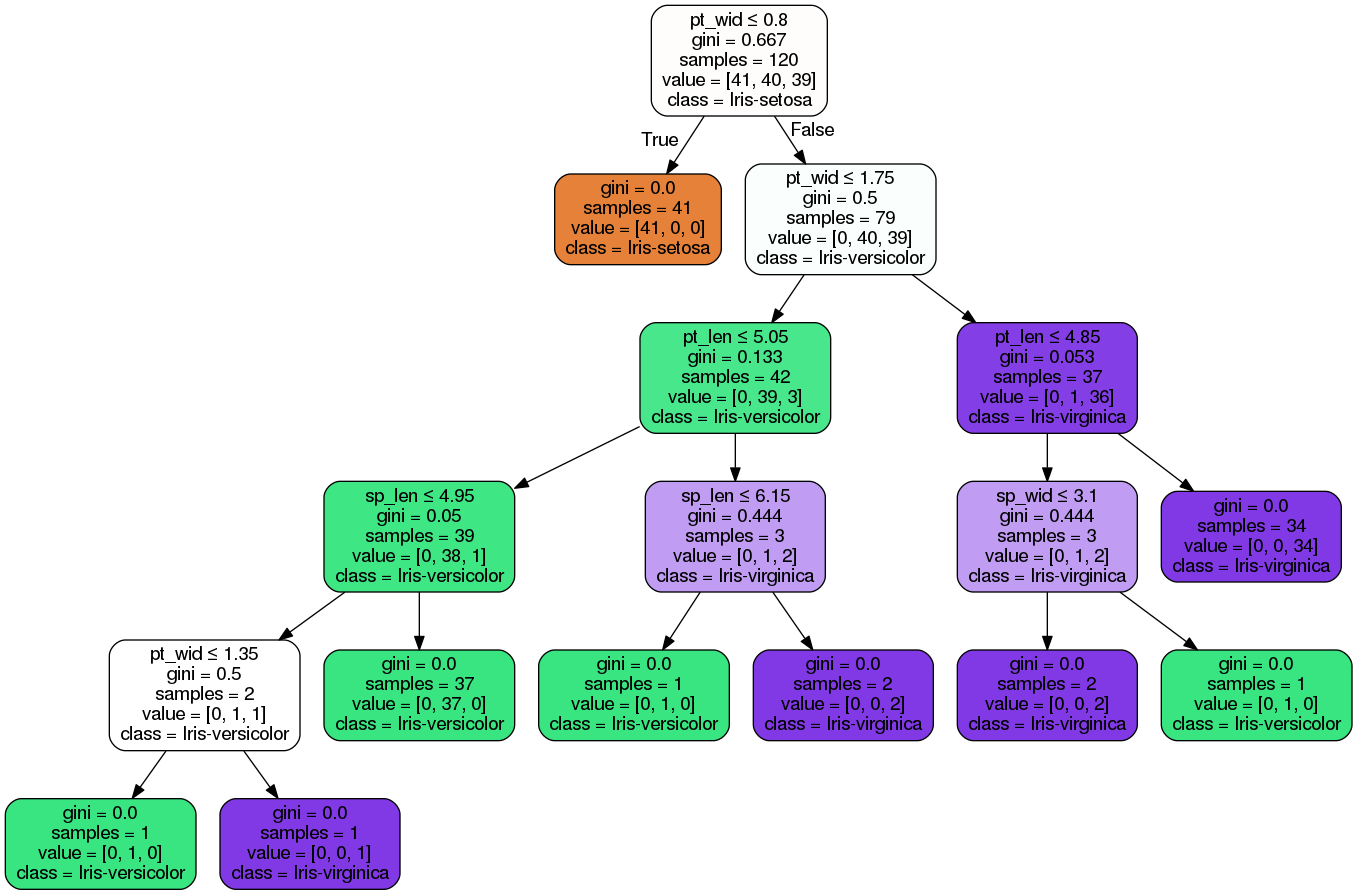

In [28]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

export_graphviz(treeClsObj, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = df.columns, class_names = treeClsObj.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Above is to draw the decision tree

Each node on the tree is decision block in which there are GINI index which is error rate of each decision node ?!? (MSA team, correct me if i'm wrong), 'samples' stands for sample size of that block. The first line is the condition of particular feature and class is the decision based on the considered feature condition.
So base on our decision tree model we have our conclusion:

-Start at the root of the tree. if petal width of a flower is equal or smaller than 0.8 cm it is "Iris-setosa"

-From the right, if petal length of a flower is larger than 4.85 cm and its petal width is larger than 1.75 there is 93.33% that the flower is "Iris-virginica"

-If sepal width of a flower is equal or smaller than 3.1 cm, its petal lenth is equal or smaller than 4.85 cm and its petal width larger than 1.75cm there is 93.33% of chance that the flower is "Iris-virginica"

-If sepal width of a flower is larger than 3.1 cm, its petal lenth is equal or smaller than 4.85 cm and its petal width larger than 1.75cm there is 93.33% of chance that the flower is "Iris-versicolor"

-If sepal length of a flower is larger than 6.15 cm, its petal length is larger than 5.05 and its petal width is in range from 0.81 to 1.76 cm, there is 93.33% of chance that the flower is "Iris-virginica"

-If sepal length of a flower is equal or smaller  than 6.15 cm, its petal length is larger than 5.05 and its petal width is in range from 0.81 to 1.76 cm, there is 93.33% of chance that the flower is "Iris-virginica"

-If sepal length of a flower is larger than 4.95, its petal length is equal or smaller than 5.05 cm and its petal width is in range from 0.81 to 1.76 cm, there is 93.33% of chance that the flower is "Iris-versicolor"

-If petal width of a flower is in range from 1.36 to 1.76 cm, its sepal length is equal or smaller than 4.95 cm and its petal length is equal or larger than 5.05 cm, there is 93.33% of chance that the flower is "Iris-virginica"

-If petal width of a flower is in range from 0.81 to 1.36 cm, its sepal length is equal or smaller than 4.95 cm and its petal length is equal or larger than 5.05 cm, there is 93.33% of chance that the flower is "Iris-versicolor"
